# Inverse Nataf transformation

Author: Dimitris G. Giovanis,
Date: June 25, 2018

Description:

In [1]:
#Import necessary libraries
from UQpy.SampleMethods import MCS, Correlate, Nataf, InvNataf
import numpy as np
import matplotlib.pyplot as plt

UQpy: Performing MCS design...
Done!
Correlation matrix in the original space
[[ 1.   0.9]
 [ 0.9  1. ]]
Correlation matrix in the transformed space
[[ 1.          0.87906049]
 [ 0.87906049  1.        ]]


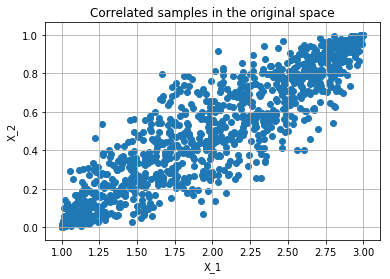

In [2]:
# Generate non-Gaussian correlated random variables
x = MCS(dimension=2, dist_name=['Normal', 'Normal'], dist_params=[[0, 1], [0, 1]], nsamples=1000)

# Define the Gaussian correlation matrix of the random variables
Rho_G = np.array([[1.0, 0.9], [0.9, 1.0]])
print('Correlation matrix in the original space')
print(Rho_G)

# Perform the nataf transformation
z = Nataf(samples=x, corr_norm=Rho_G, marginal_name=['Uniform', 'Uniform'], marginal_params=[[1, 3], [0, 1]])
print('Correlation matrix in the transformed space')
print(z.corr)

plt.figure()
plt.title('Correlated samples in the original space')
plt.scatter(z.samples_x[:, 0], z.samples_x[:, 1])
plt.grid(True)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()  

In [3]:
# Perform the inverse Nataf transformation
X = z.samples_x
Rho_NG = z.corr
p = InvNataf(samples=X, corr=Rho_NG, marginal_name=['Uniform', 'Uniform'], marginal_params=[[1, 3], [0, 1]])
print('Transformed Correlation matrix in the standard normal space')
print(p.corr_norm)

Transformed Correlation matrix in the standard normal space
[[ 1.   0.9]
 [ 0.9  1. ]]


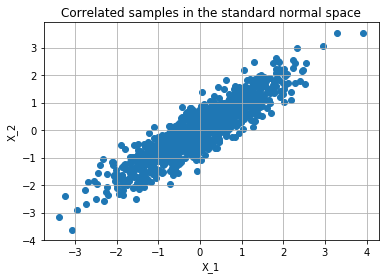

In [4]:
plt.figure()
plt.title('Correlated samples in the standard normal space')
plt.scatter(p.samples_z[:, 0], p.samples_z[:, 1])
plt.grid(True)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

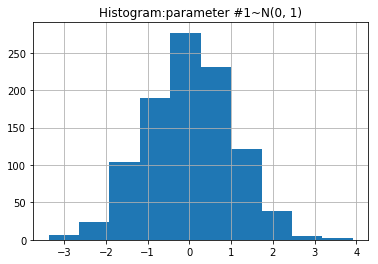

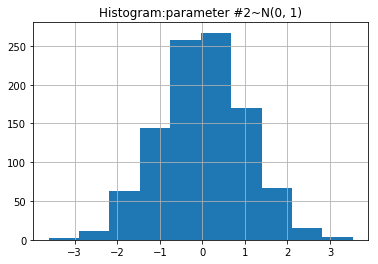

In [5]:
# Plot the distribution of the variables in the standard normal space
fig, ax = plt.subplots()
plt.title('Histogram:parameter #1~N(0, 1)')
plt.hist(p.samples_z[:, 0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)

fig, ax = plt.subplots()
plt.title('Histogram:parameter #2~N(0, 1)')
plt.hist(p.samples_z[:, 1])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

In [6]:
# Generate non-Gaussian uncorrelated random variables
x0 = MCS(dimension=2, dist_name=['Uniform', 'Gamma'], dist_params=[[4, 6], [2, 1]], nsamples=1000)

UQpy: Performing MCS design...
Done!


In [7]:
# Transform variables to the standard normal space
p0 = InvNataf(samples=x0)

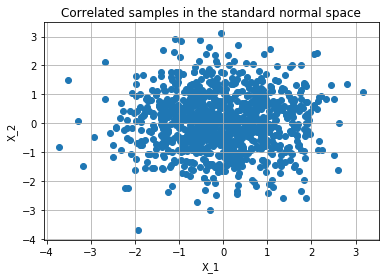

In [8]:
plt.figure()
plt.title('Uncorrelated samples in the standard normal space')
plt.scatter(p0.samples_z[:, 0], p0.samples_z[:, 1])
plt.grid(True)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()